In [50]:
from glob import glob
import os
import mne
import numpy as np
import pandas
import matplotlib.pyplot as plt
import scipy.io
import sys
import h5py
from scipy.signal import filtfilt
from scipy import stats
import scipy.fftpack as sf
from scipy import fftpack
from scipy import signal
import scipy as sc
import pylab as py
from sklearn.decomposition import FastICA

In [2]:
mat=scipy.io.loadmat('EEG_raw.mat')

In [3]:
print(mat)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Fri Dec 13 19:56:37 2013', '__version__': '1.0', '__globals__': [], 'data': array([[-5.288e+00, -2.000e-02,  5.723e+00, ..., -1.123e+00, -1.094e+00,
        -1.040e+00],
       [ 7.212e+00, -5.942e+00, -1.792e+00, ..., -3.320e-01, -4.050e-01,
        -5.180e-01],
       [ 5.370e-01,  1.309e+00,  3.218e+00, ..., -2.000e-02,  1.000e-02,
         4.900e-02],
       ...,
       [ 6.963e+00, -5.684e+00,  3.452e+00, ..., -5.660e-01, -5.470e-01,
        -5.320e-01],
       [ 0.000e+00, -4.640e-01, -1.000e-02, ...,  4.880e-01,  4.880e-01,
         4.830e-01],
       [ 0.000e+00, -1.030e+00,  0.000e+00, ...,  1.000e-02,  5.000e-03,
         1.500e-02]])}


In [4]:
print(mat['data'])

[[-5.288e+00 -2.000e-02  5.723e+00 ... -1.123e+00 -1.094e+00 -1.040e+00]
 [ 7.212e+00 -5.942e+00 -1.792e+00 ... -3.320e-01 -4.050e-01 -5.180e-01]
 [ 5.370e-01  1.309e+00  3.218e+00 ... -2.000e-02  1.000e-02  4.900e-02]
 ...
 [ 6.963e+00 -5.684e+00  3.452e+00 ... -5.660e-01 -5.470e-01 -5.320e-01]
 [ 0.000e+00 -4.640e-01 -1.000e-02 ...  4.880e-01  4.880e-01  4.830e-01]
 [ 0.000e+00 -1.030e+00  0.000e+00 ...  1.000e-02  5.000e-03  1.500e-02]]


In [5]:
X=mat["data"]
print(X)
print(type(X))

[[-5.288e+00 -2.000e-02  5.723e+00 ... -1.123e+00 -1.094e+00 -1.040e+00]
 [ 7.212e+00 -5.942e+00 -1.792e+00 ... -3.320e-01 -4.050e-01 -5.180e-01]
 [ 5.370e-01  1.309e+00  3.218e+00 ... -2.000e-02  1.000e-02  4.900e-02]
 ...
 [ 6.963e+00 -5.684e+00  3.452e+00 ... -5.660e-01 -5.470e-01 -5.320e-01]
 [ 0.000e+00 -4.640e-01 -1.000e-02 ...  4.880e-01  4.880e-01  4.830e-01]
 [ 0.000e+00 -1.030e+00  0.000e+00 ...  1.000e-02  5.000e-03  1.500e-02]]
<class 'numpy.ndarray'>


In [6]:
X[0][1000]

-1.47

In [7]:
print(X.shape)

(49, 340000)


In [104]:
A=X[1]

In [105]:
A

array([ 7.212, -5.942, -1.792, ..., -0.332, -0.405, -0.518])

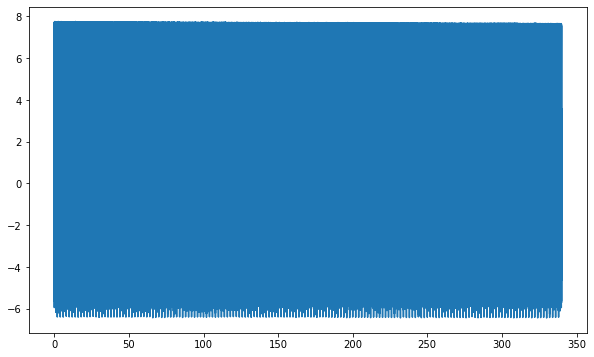

In [106]:
t=np.linspace(0,340,340000)
plt.figure(figsize=(10,6))
plt.plot(t,A)

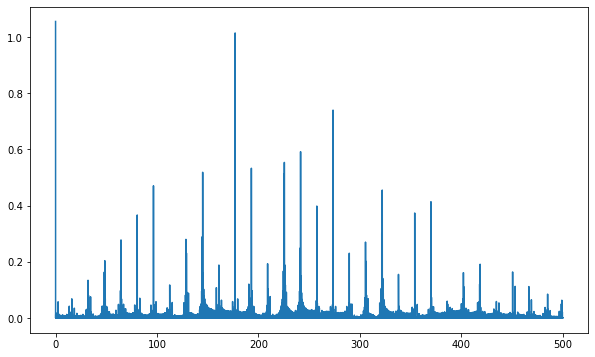

In [11]:
yf = fftpack.fft(A, t.size)
amp = np.abs(yf) # get amplitude spectrum 
freq = fftpack.fftfreq(t.size, 340/340000)
plt.figure(figsize=(10,6))
plt.plot(freq[0:freq.size//2], (2/amp.size)*amp[0:amp.size//2])
plt.show()

[1.06781176 3.9794411  6.14298271 ... 0.68580842 0.68198733 0.711259  ]


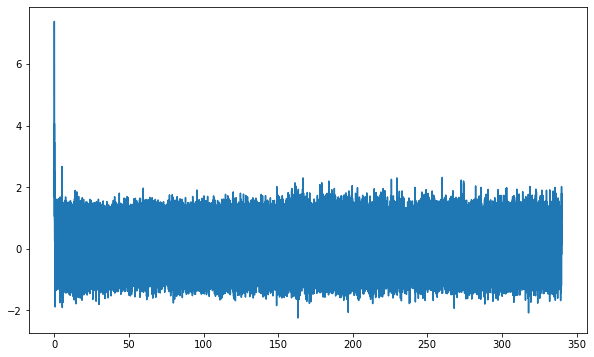

In [26]:
fs=1000
fl=1
fh=100
nyq=0.5*fs
l=fl/nyq
h=fh/nyq
order=2
b,a=scipy.signal.butter(order, [l,h], 'bandpass', analog=False)
y=scipy.signal.filtfilt(b,a,A,axis=0)
plt.figure(figsize=(10,6))
plt.plot(t,y)
print(y)

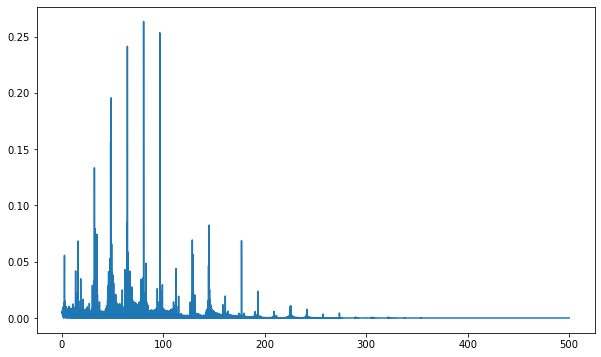

In [27]:
yf = fftpack.fft(y, t.size)
amp = np.abs(yf) # get amplitude spectrum 
freq = fftpack.fftfreq(t.size, 340/340000)
plt.figure(figsize=(10,6))
plt.plot(freq[0:freq.size//2], (2/amp.size)*amp[0:amp.size//2])
plt.show()

In [39]:
fs=1000
fl=1
fh=100
nyq=0.5*fs
l=fl/nyq
h=fh/nyq
order=2
b,a=scipy.signal.butter(order, [l,h], 'bandpass', analog=False)
i=0
BP=np.zeros((49, 340000))
for i in range(0,48):
    BP[i]=scipy.signal.filtfilt(b,a,X[i],axis=0)
print(BP)
print(BP.shape)

[[ 1.06781176e+00  3.97944110e+00  6.14298271e+00 ...  6.85808416e-01
   6.81987326e-01  7.11258999e-01]
 [-1.65247974e+00 -4.27489786e+00 -6.16345714e+00 ... -3.32154717e-01
  -3.94848427e-01 -4.85198120e-01]
 [-2.48672378e-01 -6.99840461e-01 -1.24470451e+00 ... -2.84399797e-01
  -2.42262632e-01 -2.03414552e-01]
 ...
 [-6.21621668e-01 -2.65318595e+00 -4.24076743e+00 ... -1.31758034e-01
  -1.16268382e-01 -9.90040359e-02]
 [ 5.37668988e-03 -3.46823233e-02 -5.34798231e-02 ...  3.79921064e-03
   3.22121200e-03  2.01962809e-03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
(49, 340000)


In [29]:
print(X)

[[-5.288e+00 -2.000e-02  5.723e+00 ... -1.123e+00 -1.094e+00 -1.040e+00]
 [ 7.212e+00 -5.942e+00 -1.792e+00 ... -3.320e-01 -4.050e-01 -5.180e-01]
 [ 5.370e-01  1.309e+00  3.218e+00 ... -2.000e-02  1.000e-02  4.900e-02]
 ...
 [ 6.963e+00 -5.684e+00  3.452e+00 ... -5.660e-01 -5.470e-01 -5.320e-01]
 [ 0.000e+00 -4.640e-01 -1.000e-02 ...  4.880e-01  4.880e-01  4.830e-01]
 [ 0.000e+00 -1.030e+00  0.000e+00 ...  1.000e-02  5.000e-03  1.500e-02]]


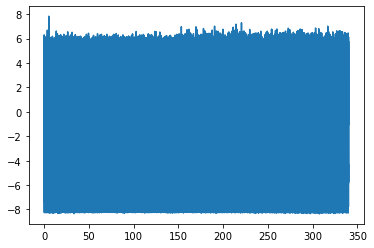

In [30]:
plt.plot(t,X[0])

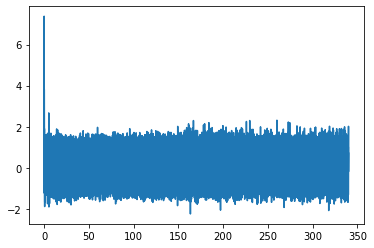

In [31]:
plt.plot(t,BP[0])

In [32]:
samp_freq = 1000
notch_freq = 60.0
quality_factor = 20.0
 
b_notch, a_notch = signal.iirnotch(notch_freq, quality_factor, samp_freq)
 
freq, h = signal.freqz(b_notch, a_notch, fs=samp_freq)

In [44]:
outputSignal = signal.filtfilt(b_notch, a_notch,y )

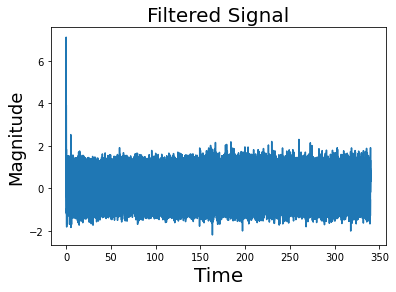

In [34]:
plt.plot(t, outputSignal)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Magnitude', fontsize=18)
plt.title('Filtered Signal', fontsize=20)
plt.subplots_adjust(hspace=0.5)
plt.show()

In [46]:
NF=np.zeros((49,340000))
for i in range(0,48):
    NF[i] = signal.filtfilt(b_notch, a_notch,BP[i] )
print(NF)
print(NF.shape)

[[ 1.09163339e+00  3.90833543e+00  5.98452269e+00 ...  7.75496679e-01
   7.88802330e-01  8.24602056e-01]
 [-1.68662824e+00 -4.24394724e+00 -6.07100093e+00 ... -2.19581813e-01
  -3.22212473e-01 -4.59382550e-01]
 [-2.86337814e-01 -7.08425391e-01 -1.22345129e+00 ... -2.73651598e-01
  -2.51215562e-01 -2.31196914e-01]
 ...
 [-6.17955031e-01 -2.59424688e+00 -4.13271885e+00 ... -5.94157762e-02
  -7.40342319e-02 -9.09777438e-02]
 [ 8.51363296e-03 -2.85063217e-02 -4.48487517e-02 ... -7.63521675e-03
  -5.02587736e-03 -2.23716877e-03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
(49, 340000)


In [47]:
samp_freq = 1000
notch_freq = 120.0
quality_factor = 20.0
 
b_notch, a_notch = signal.iirnotch(notch_freq, quality_factor, samp_freq)
 
freq, h = signal.freqz(b_notch, a_notch, fs=samp_freq)
NF1=np.zeros((49,340000))
for i in range(0,48):
    NF1[i] = signal.filtfilt(b_notch, a_notch,NF[i] )
print(NF1)
print(NF1.shape)

[[ 1.07419121e+00  3.80876450e+00  5.85632680e+00 ...  7.80926145e-01
   8.19098427e-01  8.63393209e-01]
 [-1.67627455e+00 -4.19197465e+00 -6.00564459e+00 ... -2.45201754e-01
  -3.64312882e-01 -4.95541907e-01]
 [-2.64841889e-01 -7.10960496e-01 -1.24835152e+00 ... -2.66626496e-01
  -2.49528735e-01 -2.35670054e-01]
 ...
 [-6.11646101e-01 -2.59580085e+00 -4.14143307e+00 ... -9.67147326e-02
  -9.56331571e-02 -8.54435172e-02]
 [ 7.79112052e-03 -2.69966072e-02 -4.19338593e-02 ... -1.00041416e-02
  -7.14998810e-03 -2.95594056e-03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
(49, 340000)


In [82]:
S=NF1[0]

for i in range(1,42):
    S=np.c_[S,NF1[i]]
S.shape

(340000, 42)

In [83]:
S /= S.std(axis=0)

In [95]:
ica = FastICA(n_components=43)

In [96]:
print(ica)
S_ = ica.fit_transform(S)

FastICA(n_components=43)


C:\Users\gokul\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:468: UserWarning: n_components is too large: it will be set to 42
  warnings.warn(


In [98]:
S_

array([[-3.90596568e-03, -3.07093441e-03, -1.27770822e-03, ...,
         3.93959882e-03, -1.31754331e-02, -2.76692442e-03],
       [-1.61453144e-03, -1.36523292e-03,  1.53982688e-03, ...,
         3.23710412e-03, -1.00339232e-02, -1.05255007e-02],
       [-1.73861794e-04, -4.27039803e-04,  3.35829719e-03, ...,
         2.90972720e-03, -8.21843779e-03, -1.58403754e-02],
       ...,
       [-4.67896970e-04,  8.63517376e-04,  3.22003680e-04, ...,
         3.10916994e-03, -2.49668226e-03, -4.42807699e-05],
       [-4.94440089e-04,  3.14450274e-04,  2.48833225e-04, ...,
         2.75022035e-03, -2.04991637e-03, -1.91362508e-04],
       [-4.08318224e-04, -3.36125218e-04,  2.67790706e-04, ...,
         2.47089463e-03, -1.53919610e-03, -3.51067163e-04]])

In [100]:
S_.shape

(340000, 42)

In [101]:
A=S_.T

In [102]:
A

array([[-3.90596568e-03, -1.61453144e-03, -1.73861794e-04, ...,
        -4.67896970e-04, -4.94440089e-04, -4.08318224e-04],
       [-3.07093441e-03, -1.36523292e-03, -4.27039803e-04, ...,
         8.63517376e-04,  3.14450274e-04, -3.36125218e-04],
       [-1.27770822e-03,  1.53982688e-03,  3.35829719e-03, ...,
         3.22003680e-04,  2.48833225e-04,  2.67790706e-04],
       ...,
       [ 3.93959882e-03,  3.23710412e-03,  2.90972720e-03, ...,
         3.10916994e-03,  2.75022035e-03,  2.47089463e-03],
       [-1.31754331e-02, -1.00339232e-02, -8.21843779e-03, ...,
        -2.49668226e-03, -2.04991637e-03, -1.53919610e-03],
       [-2.76692442e-03, -1.05255007e-02, -1.58403754e-02, ...,
        -4.42807699e-05, -1.91362508e-04, -3.51067163e-04]])

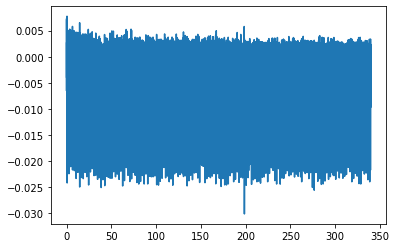

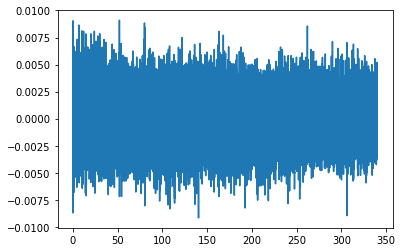

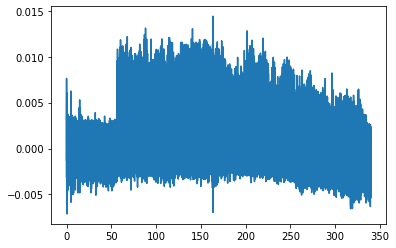

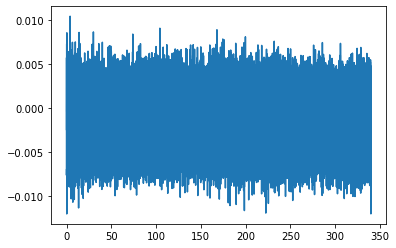

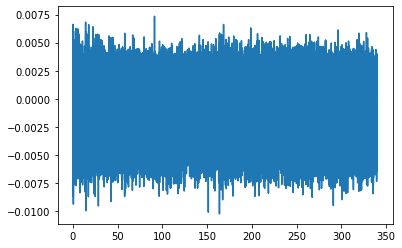

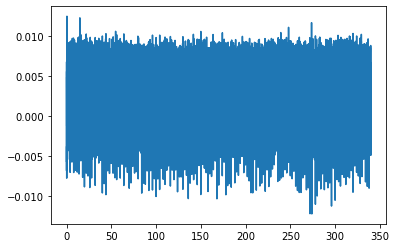

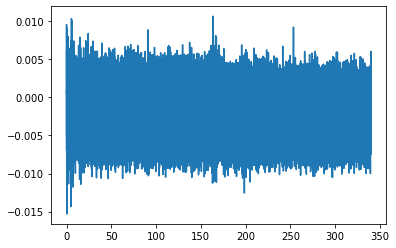

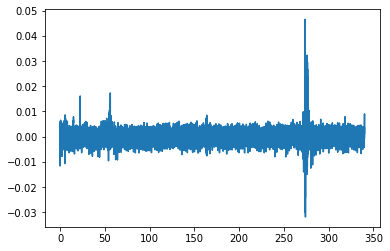

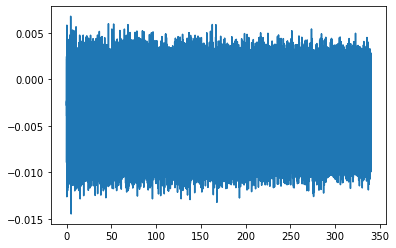

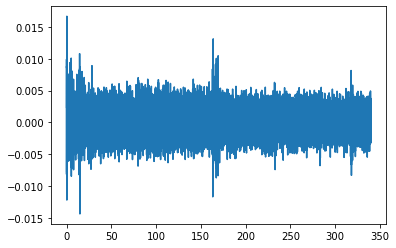

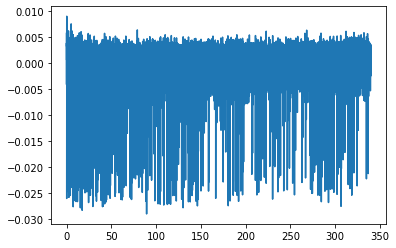

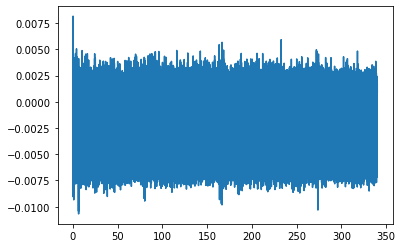

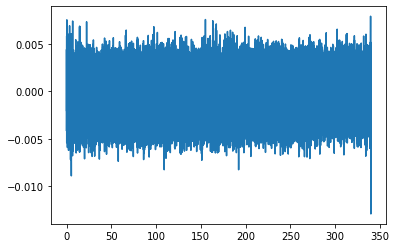

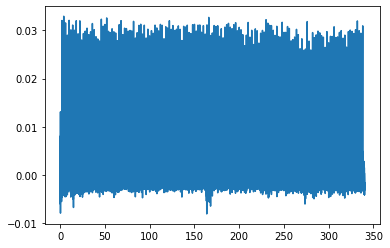

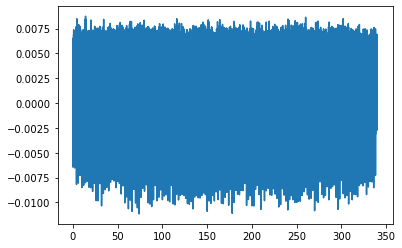

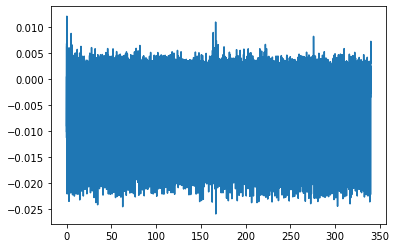

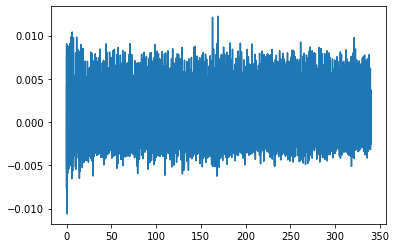

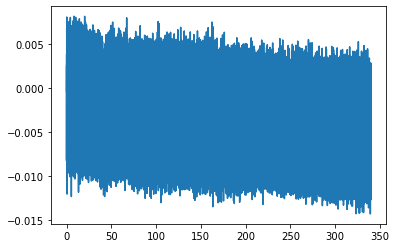

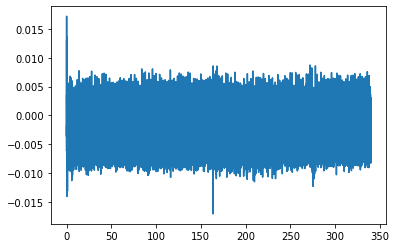

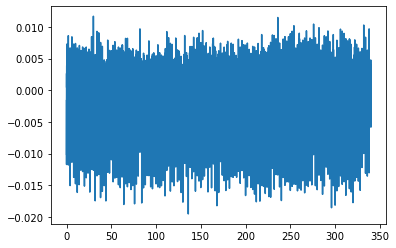

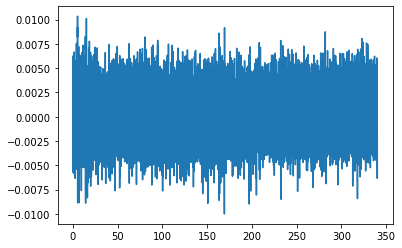

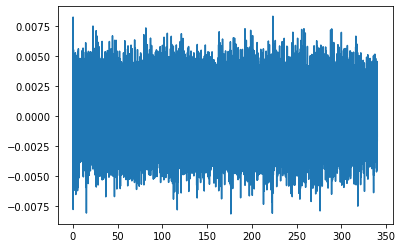

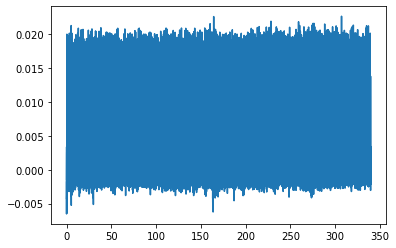

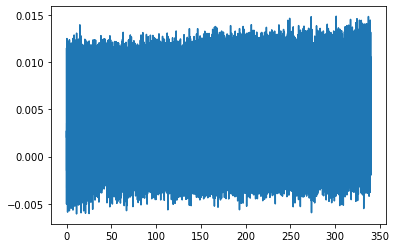

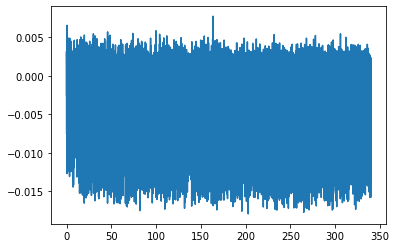

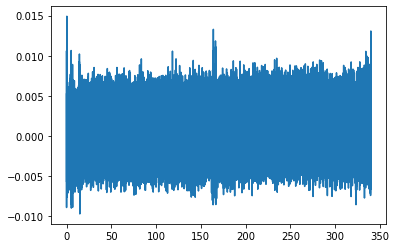

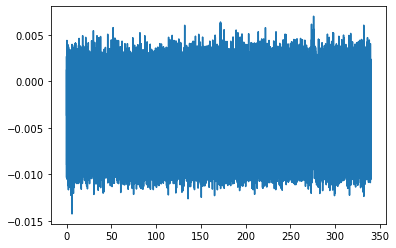

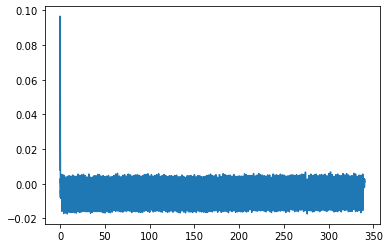

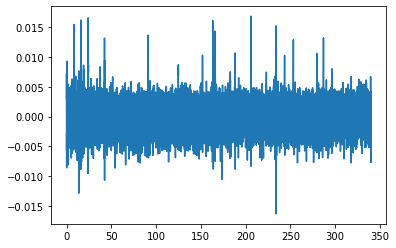

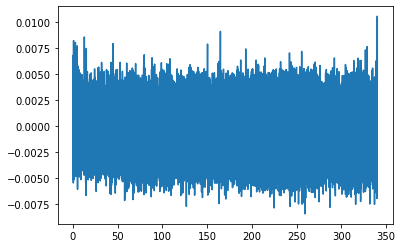

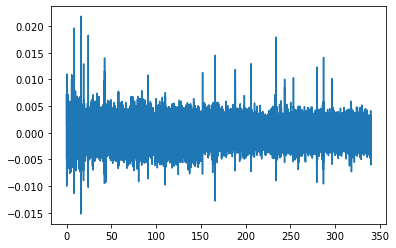

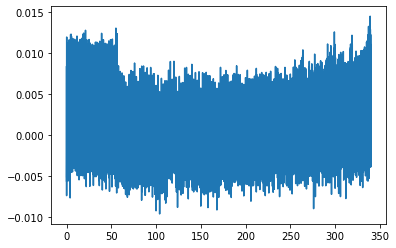

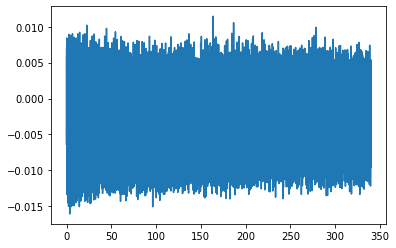

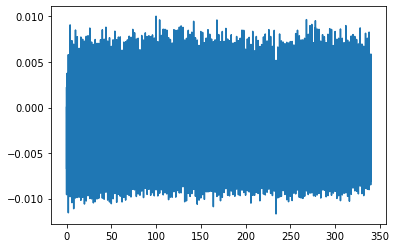

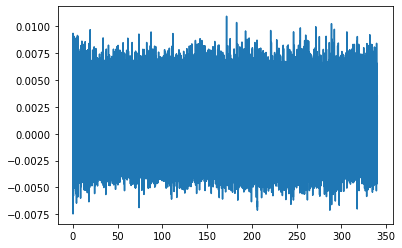

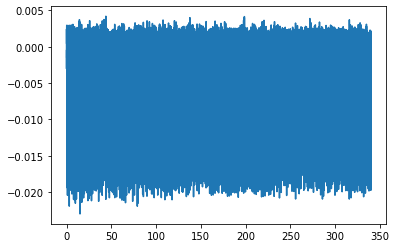

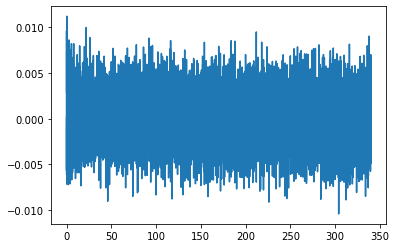

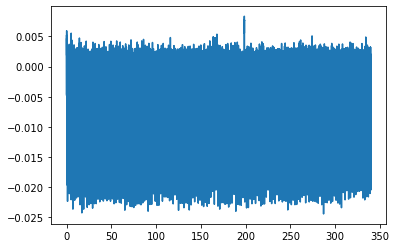

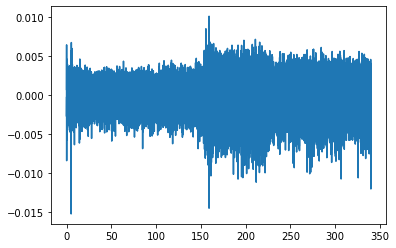

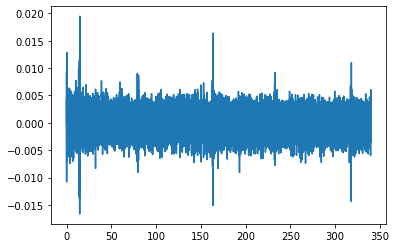

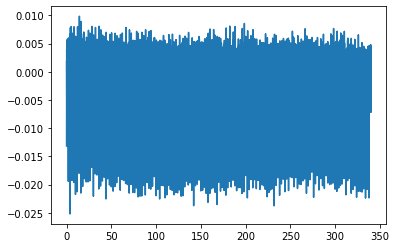

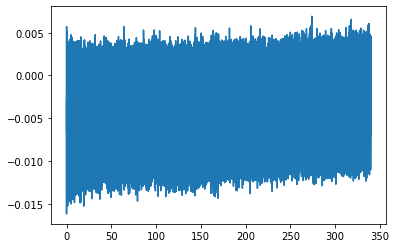

In [103]:
for i in range(0,42):
    plt.plot(t,A[i])
    plt.show()
